<a href="https://colab.research.google.com/github/BitBarddev/FUTURE_DS_03/blob/main/College_Event_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up the Environment**

In [ ]:
!pip install vaderSentiment
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# **Get the Data**

In [ ]:
df = pd.read_excel('/content/Student_Satisfaction_Survey.xlsx')
df.head()

SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Weightage 1  \
0  How much of the syllabus was covered in the cl...            0   
1  How well did the teachers prepare for the clas...            0   
2    How well were the teachers able to communicate?            0   
3  The teacher’s approach to teaching can best be...            0   
4  Fairness of the internal evaluation process by...            0   

   Weightage 2  Weightage 3  Weightage 4  Weightage 5 Average/ Percentage  \
0            0            1            0            0        3.00 / 60.00   
1            0            0            0            1       5.00 / 100.00   
2            0            0            0            1       5.00 / 100.00   
3            0            1            0            0        3.00 / 60.00   
4            0            0            1            0        4.00 / 80.00   

               Course Name            Basic Course  
0  FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
1  FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
2  FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
3  FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY  
4  FY B.VOC FOOD TECHNOLOGY  B.VOC FOOD TECHNOLOGY

# **Load, Inspect and Explore the Data**

In [ ]:
df.info()
df.describe
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [ ]:
print(df.isnull().sum())

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64


# **Clean the Data for Aggregated Format**

In [ ]:
df.rename(columns={
    'Weightage 1': 'Rating_1',
    'Weightage 2': 'Rating_2',
    'Weightage 3': 'Rating_3',
    'Weightage 4': 'Rating_4',
    'Weightage 5': 'Rating_5'
}, inplace=True)

for col in ['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Questions'], inplace=True)
df.dropna(subset=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Rating_1  Rating_2  \
0  How much of the syllabus was covered in the cl...         0         0   
1  How well did the teachers prepare for the clas...         0         0   
2    How well were the teachers able to communicate?         0         0   
3  The teacher’s approach to teaching can best be...         0         0   
4  Fairness of the internal evaluation process by...         0         0   

   Rating_3  Rating_4  Rating_5 Average/ Percentage              Course Name   \
0         1         0         0        3.00 / 60.00  FY B.VOC FOOD TECHNOLOGY   
1         0         0         1       5.00 / 100.00  FY B.VOC FOOD TECHNOLOGY   
2         0         0         1       5.00 / 100.00  FY B.VOC FOOD TECHNOLOGY   
3         1         0         0        3.00 / 60.00  FY B.VOC FOOD TECHNOLOGY   
4         0         1         0        4.00 / 80.00  FY B.VOC FOOD TECHNOLOGY   

            Basic Course  
0  B.VOC FOOD TECHNOLOGY  
1  B.VOC FOOD TECHNOLOGY  
2  B.VOC FOOD TECHNOLOGY  
3  B.VOC FOOD TECHNOLOGY  
4  B.VOC FOOD TECHNOLOGY

# **Analyze Ratings**

In [ ]:
df.rename(columns={
    'Weightage 1': 'Rating_1',
    'Weightage 2': 'Rating_2',
    'Weightage 3': 'Rating_3',
    'Weightage 4': 'Rating_4',
    'Weightage 5': 'Rating_5'
}, inplace=True)

for col in ['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Questions'], inplace=True)
df.dropna(subset=['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'], inplace=True)

df.reset_index(drop=True, inplace=True)

df['Total_Responses'] = df[['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']].sum(axis=1)

df['Average_Rating'] = (
    (1*df['Rating_1']) +
    (2*df['Rating_2']) +
    (3*df['Rating_3']) +
    (4*df['Rating_4']) +
    (5*df['Rating_5']) / df['Total_Responses']
).round(2)

df.head()

SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Rating_1  Rating_2  \
0  How much of the syllabus was covered in the cl...         0         0   
1  How well did the teachers prepare for the clas...         0         0   
2    How well were the teachers able to communicate?         0         0   
3  The teacher’s approach to teaching can best be...         0         0   
4  Fairness of the internal evaluation process by...         0         0   

   Rating_3  Rating_4  Rating_5 Average/ Percentage              Course Name   \
0         1         0         0        3.00 / 60.00  FY B.VOC FOOD TECHNOLOGY   
1         0         0         1       5.00 / 100.00  FY B.VOC FOOD TECHNOLOGY   
2         0         0         1       5.00 / 100.00  FY B.VOC FOOD TECHNOLOGY   
3         1         0         0        3.00 / 60.00  FY B.VOC FOOD TECHNOLOGY   
4         0         1         0        4.00 / 80.00  FY B.VOC FOOD TECHNOLOGY   

            Basic Course  Total_Responses  Average_Rating  
0  B.VOC FOOD TECHNOLOGY                1             3.0  
1  B.VOC FOOD TECHNOLOGY                1             5.0  
2  B.VOC FOOD TECHNOLOGY                1             5.0  
3  B.VOC FOOD TECHNOLOGY                1             3.0  
4  B.VOC FOOD TECHNOLOGY                1             4.0

In [ ]:
df.sort_values(by='Average_Rating', ascending=False, inplace=True)
df.head()

SN  Total Feedback Given  Total Configured  \
41   2                    74               119   
54  15                    74               119   
47   8                    74               119   
48   9                    74               119   
55  16                    74               119   

                                            Questions  Rating_1  Rating_2  \
41  How well did the teachers prepare for the clas...         1         1   
54  The institution makes effort to engage student...         0         4   
47  The teaching and mentoring process in your ins...         1         4   
48  The institution provides multiple opportunitie...         1         3   
55  The institute/ teachers use student-centric me...         1         5   

    Rating_3  Rating_4  Rating_5 Average/ Percentage  \
41        14        52         6        3.82 / 76.49   
54         9        46        15        3.97 / 79.46   
47        12        40        17        3.92 / 78.38   
48         8        43        19        4.03 / 80.54   
55         5        44        19        4.01 / 80.27   

                      Course Name   \
41  FY BCOM (ACCOUNTING & FINANCE)   
54  FY BCOM (ACCOUNTING & FINANCE)   
47  FY BCOM (ACCOUNTING & FINANCE)   
48  FY BCOM (ACCOUNTING & FINANCE)   
55  FY BCOM (ACCOUNTING & FINANCE)   

                                     Basic Course  Total_Responses  \
41  BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)               74   
54  BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)               74   
47  BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)               74   
48  BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)               74   
55  BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)               74   

    Average_Rating  
41          253.41  
54          220.01  
47          206.15  
48          204.28  
55          203.28

# **Visualize Rating Trends**

1. Bar Chart of Average Ratings

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Questions', y='Average_Rating', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Average Rating (1 to 5)')
plt.ylabel('Survey Questions')
plt.title('Average Satisfaction Rating by Question', fontsize=14)
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-898111534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Questions', y='Average_Rating', data=df, palette='viridis')
/tmp/ipython-input-42-898111534.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


2. Heatmap of Raw Ratings

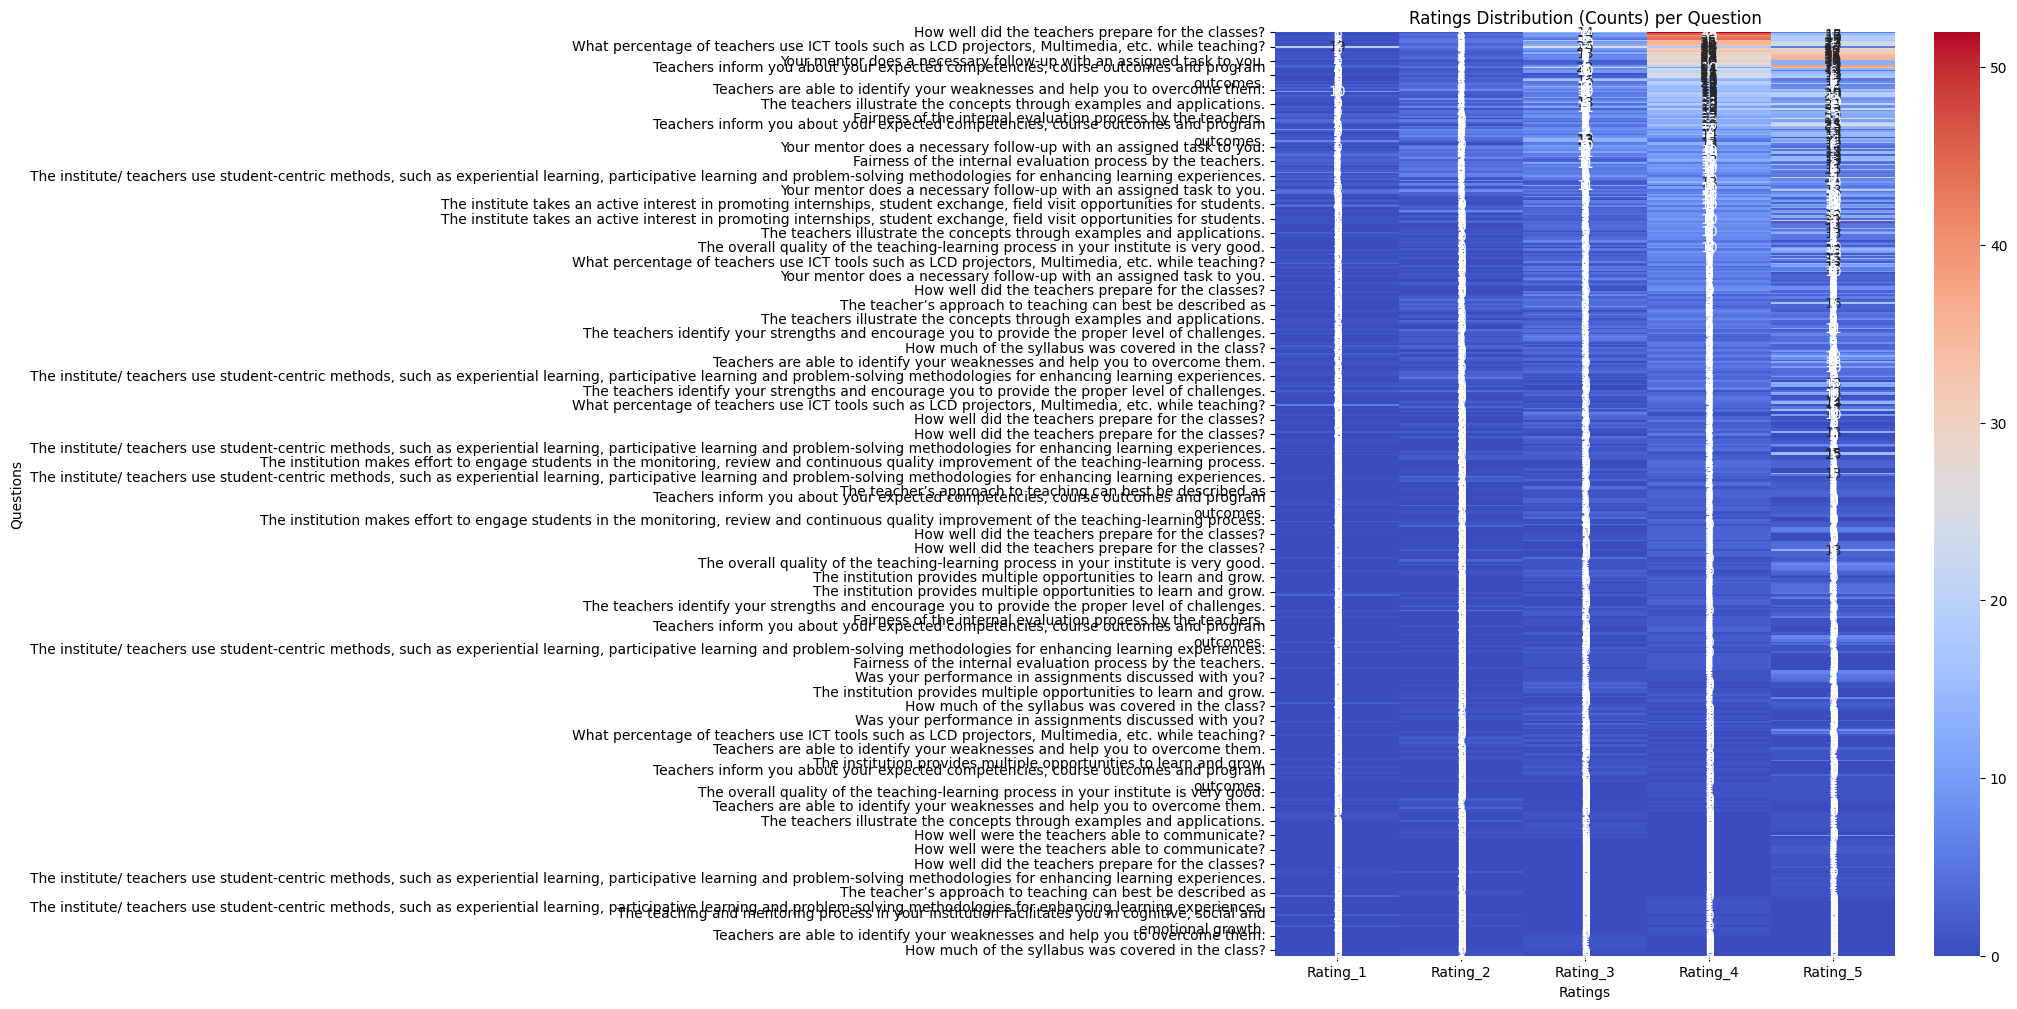

In [ ]:
ratings_matrix = df[['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']]
ratings_matrix.index = df['Questions']

plt.figure(figsize=(10, 12))
sns.heatmap(ratings_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Ratings Distribution (Counts) per Question')
plt.xlabel('Ratings')
plt.ylabel('Questions')
plt.show()

3. Horizontal Bar Chart - Sorted by Average Rating

/tmp/ipython-input-21-663849178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Rating', y='Questions', data=df_sorted, palette='coolwarm')
/tmp/ipython-input-21-663849178.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


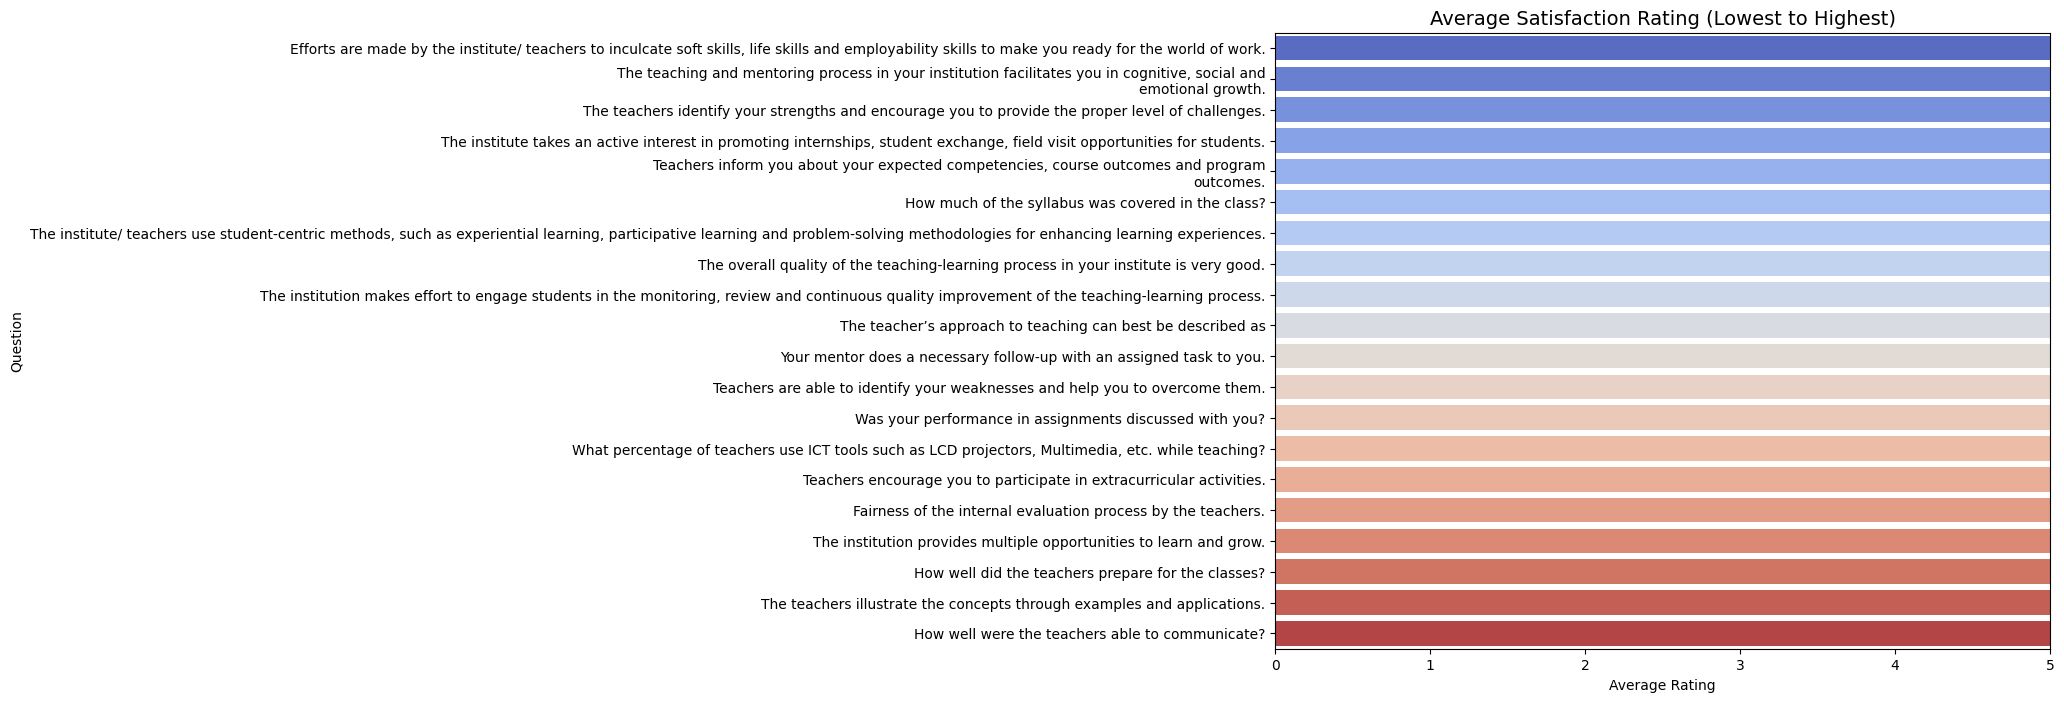

In [ ]:
plt.figure(figsize=(10, 8))
df_sorted = df.sort_values('Average_Rating')

sns.barplot(x='Average_Rating', y='Questions', data=df_sorted, palette='coolwarm')
plt.title('Average Satisfaction Rating (Lowest to Highest)', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Question')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

4. Stacked Bar Chart - Distribution of Ratings

In [ ]:
rating_cols = ['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']
df_stacked = df[rating_cols]
df_stacked.index = df['Questions']

df_stacked.plot(kind='barh', stacked=True, figsize=(10, 12), colormap='coolwarm')
plt.title('Stacked Distribution of Ratings per Question')
plt.xlabel('Number of Responses')
plt.ylabel('Question')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3309912838.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


5. Pie Chart - Overall Rating Distribution (All Questions Combined)

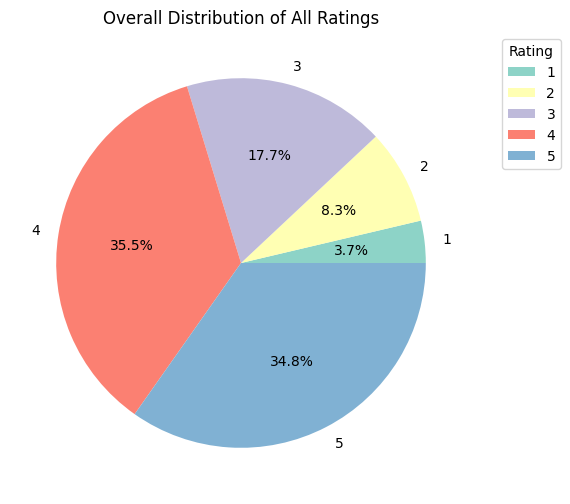

In [ ]:
total_ratings = df[rating_cols].sum()

plt.figure(figsize=(6, 6))
total_ratings.plot.pie(autopct='%1.1f%%', labels=[1,2,3,4,5], colors=sns.color_palette('Set3'))
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Overall Distribution of All Ratings')
plt.show()

In [ ]:
df.columns.tolist()

['SN',
 'Total Feedback Given',
 'Total Configured',
 'Questions',
 'Rating_1',
 'Rating_2',
 'Rating_3',
 'Rating_4',
 'Rating_5',
 'Average/ Percentage',
 'Course Name ',
 'Basic Course',
 'Total_Responses',
 'Average_Rating']

6. Count of Responses per Course (Course Name)

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Course Name ', order=df['Course Name '].value_counts().index, palette='magma')
plt.title('Number of Feedback Responses by Course')
plt.xlabel('Number of Responses')
plt.ylabel('Course Name')
plt.tight_layout()
plt.show()

/tmp/ipython-input-39-1292258432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Course Name ', order=df['Course Name '].value_counts().index, palette='magma')


7. Count of Responses per Course (Basic Course)

/tmp/ipython-input-26-3198135443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Basic Course', order=df['Basic Course'].value_counts().index, palette='magma')


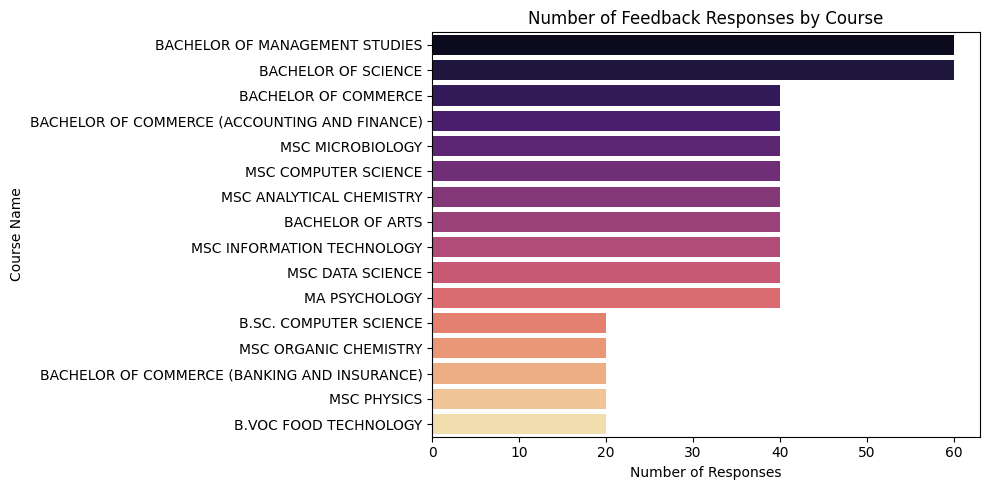

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Basic Course', order=df['Basic Course'].value_counts().index, palette='magma')
plt.title('Number of Feedback Responses by Course')
plt.xlabel('Number of Responses')
plt.ylabel('Course Name')
plt.tight_layout()
plt.show()

8. Average Satisfaction Rating Per Course

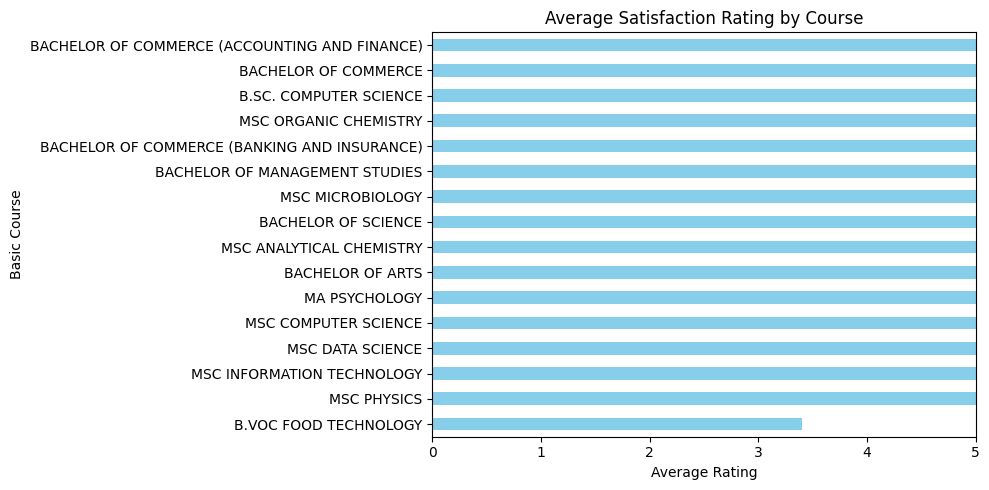

In [ ]:
avg_rating_by_course = df.groupby('Basic Course')['Average_Rating'].mean().sort_values()

plt.figure(figsize=(10, 5))
avg_rating_by_course.plot(kind='barh', color='skyblue')
plt.title('Average Satisfaction Rating by Course')
plt.xlabel('Average Rating')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

9. Stacked Bar Chart - Rating Distribution per Course

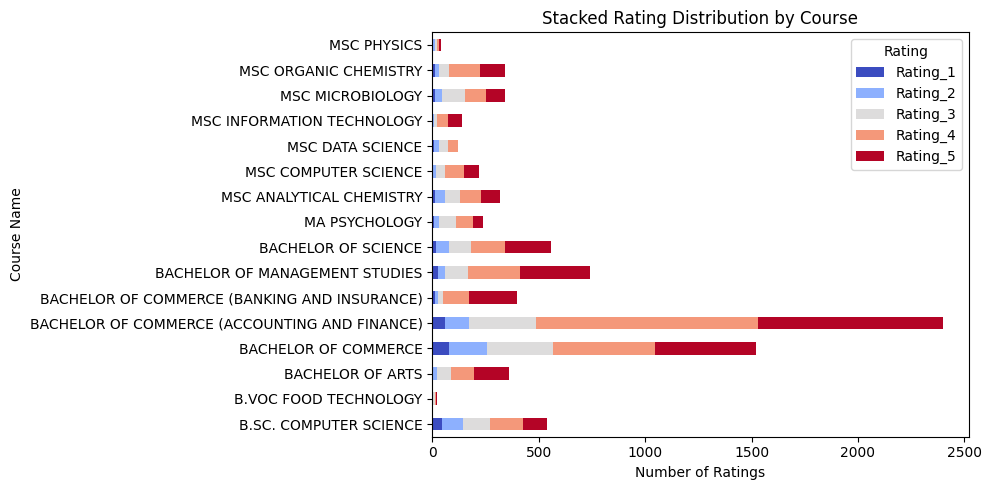

In [ ]:
course_ratings = df.groupby('Basic Course')[['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5']].sum()

course_ratings.plot(kind='barh', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Stacked Rating Distribution by Course')
plt.xlabel('Number of Ratings')
plt.ylabel('Course Name')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

In [ ]:
df.columns.tolist()

['SN',
 'Total Feedback Given',
 'Total Configured',
 'Questions',
 'Rating_1',
 'Rating_2',
 'Rating_3',
 'Rating_4',
 'Rating_5',
 'Average/ Percentage',
 'Course Name ',
 'Basic Course',
 'Total_Responses',
 'Average_Rating']

# **Sentiment Analysis**

Setup Environment for NLTK-VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Sentiment Analysis with VADER

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df['Questions'] = df['Questions'].fillna('')
df['Sentiment_Score'] = df['Questions'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def Classify_sentiment(score):
  if score>=0.05:
    return 'Positive'
  elif score<=-0.05:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment'] = df['Sentiment_Score'].apply(Classify_sentiment)

Visualize Sentiment Distribution

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution of Student Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-759567115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


Word Cloud for Positive & Negative Feedback

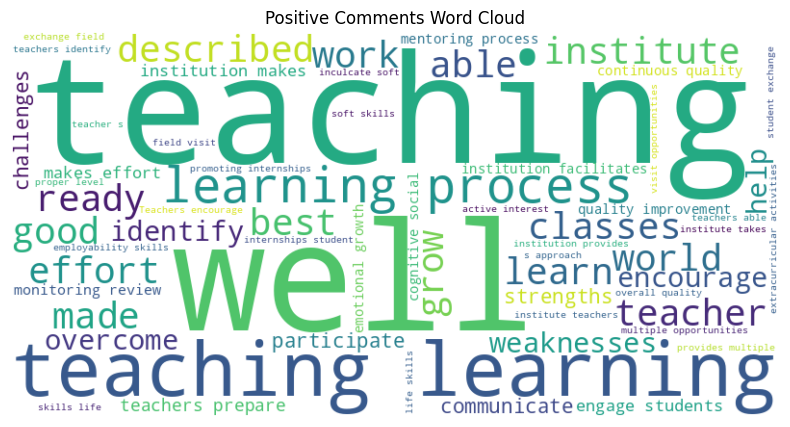

⚠️ No negative comments available to generate a word cloud.


In [ ]:
from wordcloud import WordCloud

positive_comments = ' '.join(df[df['Sentiment'] == 'Positive']['Questions'])
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['Questions'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments Word Cloud')
plt.show()

if not negative_comments.strip():
    print("⚠️ No negative comments available to generate a word cloud.")
else:
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Feedback')
    plt.show()